In [2]:
import streamlit as st
import pandas as pd
import requests
from io import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
DATA_URL = ('https://drive.google.com/u/0/uc?id=1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7&export=download')

st.title("Term Deposit Data Analysis")
url = requests.get(DATA_URL)
csv = StringIO(url.text)
data_load_state = st.text('Loading data...')
dfs = pd.read_csv(csv)
data_load_state.text('Loading data...done!')

st.subheader('Raw data')
st.write(dfs)
rows = len(dfs.index)
st.write('Original dataset: {} rows'.format(rows))

dfs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [3]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
dfs.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


# Data Exploration
Let's get the customers who are subscribed

In [5]:
subscribed = dfs['y'] == "yes"
data_subscribed = dfs[subscribed]
print(data_subscribed)

       age         job   marital  education default  balance housing loan  \
83      59       admin   married  secondary      no     2343     yes   no   
86      56       admin   married  secondary      no       45      no   no   
87      41  technician   married  secondary      no     1270     yes   no   
129     55    services   married  secondary      no     2476     yes   no   
168     54       admin   married   tertiary      no      184      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
39986   29  management    single   tertiary      no      637     yes   no   
39988   55  management  divorced   tertiary      no     2383      no   no   
39990   26  technician    single  secondary      no     1231     yes   no   
39996   30  management    single   tertiary      no     3340      no   no   
39997   54       admin  divorced  secondary      no      200      no   no   

        contact  day month  duration  campaign    y  
83      unknown    5 

In [6]:
data_subscribed.describe()

,age,balance,day,duration,campaign
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000
mean,39.844959,1588.495856,15.827003,682.958564,2.414365
std,11.001984,2924.894429,8.557604,431.287174,2.306015
min,19.000000,-3058.000000,1.000000,8.000000,1.000000
25%,31.000000,141.000000,8.000000,364.000000,1.000000
50%,37.000000,620.000000,16.000000,629.000000,2.000000
75%,47.000000,1820.500000,22.000000,913.000000,3.000000
max,95.000000,45248.000000,31.000000,3881.000000,32.000000


<AxesSubplot:>

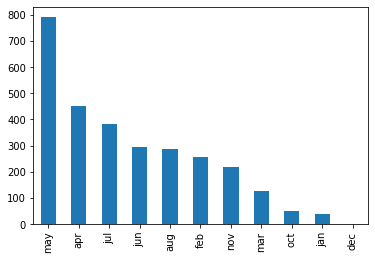

In [7]:
#Month Plot
data_subscribed["month"].value_counts().plot(kind='bar')

<AxesSubplot:>

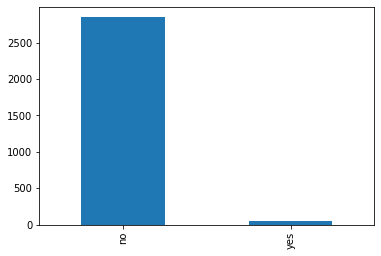

In [8]:
#Default Plot
data_subscribed["default"].value_counts().plot(kind='bar')

<AxesSubplot:>

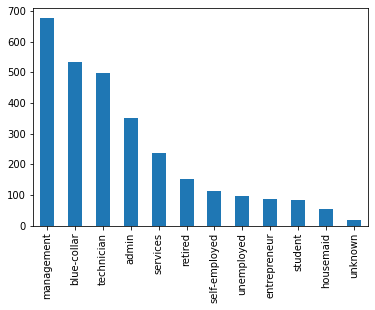

In [9]:
#Job Plot
data_subscribed["job"].value_counts().plot(kind='bar')

<AxesSubplot:>

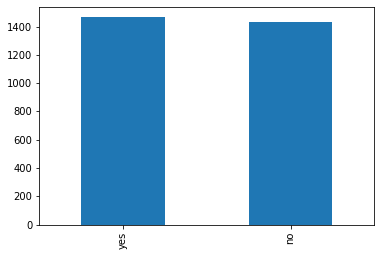

In [10]:
#Housing Plot
data_subscribed["housing"].value_counts().plot(kind='bar')

<AxesSubplot:>

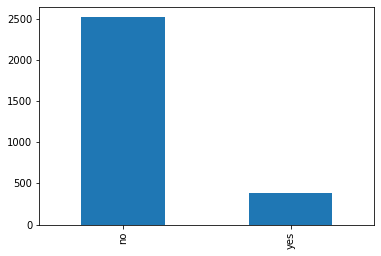

In [11]:
#Loan Plot
data_subscribed["loan"].value_counts().plot(kind='bar')

<AxesSubplot:>

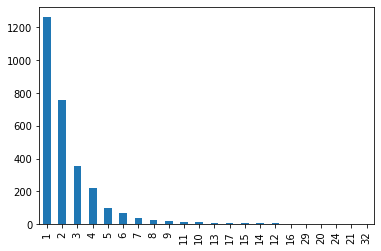

In [12]:
#Campaign Plot
data_subscribed["campaign"].value_counts().plot(kind='bar')

<AxesSubplot:>

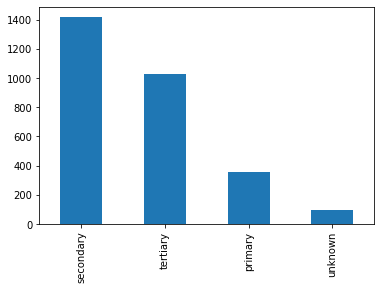

In [13]:
#Education Plot
data_subscribed["education"].value_counts().plot(kind='bar')

<AxesSubplot:>

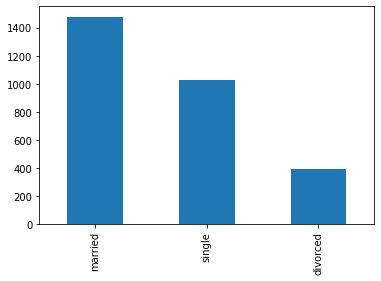

In [14]:
#Marital Plot
data_subscribed["marital"].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

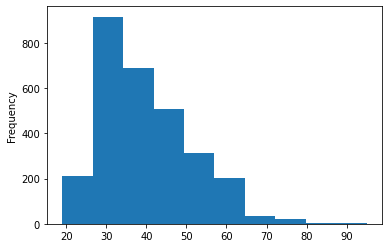

In [15]:
data_subscribed["age"].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

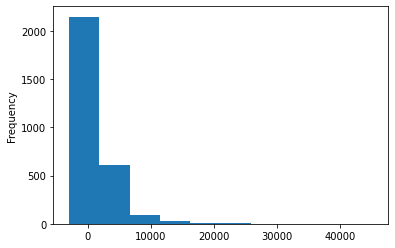

In [16]:
data_subscribed["balance"].plot.hist(bins=10)

# Thoughts
* Campaign (1 - 7 days)
* Marital != Divorced
* Age (25 - 40)
* Default = No
* Balance < 10000

## Column Drops
* Drop day column
* Drop month
* Drop duration
* Drop contact
* Drop housing

## Categorization and Mappings
* Bin the ages
* Map default, loan to binary
* Map y to binary



In [17]:
# Convert y to binary
dfs["y"] = dfs["y"].map({'yes': 1, 'no': 0})

# Convert default, loan to binary
dfs["default"] = dfs["default"].map({'yes': 1, 'no': 0})
dfs["loan"] = dfs["loan"].map({'yes': 1, 'no': 0})

# Convert age column to ordinal / age range
bins = [25, 35, 45, 55, 65, 75, 85]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
dfs["age_range"] = pd.cut(dfs["age"], bins, labels = labels,include_lowest = True)

#Drop day, month, housing, duration, contact columns
dfs = dfs.drop(columns=["day", "month","housing", "duration", "contact","age"])

In [18]:
print(dfs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  object  
 2   marital    40000 non-null  object  
 3   education  40000 non-null  object  
 4   default    40000 non-null  int64   
 5   balance    40000 non-null  int64   
 6   loan       40000 non-null  int64   
 7   campaign   40000 non-null  int64   
 8   y          40000 non-null  int64   
 9   age_range  39474 non-null  category
dtypes: category(1), int64(6), object(3)
memory usage: 2.8+ MB
None


In [19]:
dfs.head()

,age,job,marital,education,default,balance,loan,campaign,y,age_range
0,58,management,married,tertiary,0,2143,0,1,0,45-54
1,44,technician,single,secondary,0,29,0,1,0,25-34
2,33,entrepreneur,married,secondary,0,2,1,1,0,18-24
3,47,blue-collar,married,unknown,0,1506,0,1,0,35-44
4,33,unknown,single,unknown,0,1,0,1,0,18-24
